## List of features (signals)
* hydrophobicity
* molecular weight
* node degree
* node clustering coefficient
* amino acid frequency

In [29]:
import os
import numpy as np
from pygsp import graphs
import pickle
import csv
import collections
import networkx as nx
import matplotlib.pyplot as plt

In [30]:
amino_hydrophobicity =  {'A': 1.8,'R':-4.5,'N':-3.5,'D':-3.5,'C': 2.5,
       'Q':-3.5,'E':-3.5,'G':-0.4,'H':-3.2,'I': 4.5,
       'L': 3.8,'K':-3.9,'M': 1.9,'F': 2.8,'P':-1.6,
       'S':-0.8,'T':-0.7,'W':-0.9,'Y':-1.3,'V': 4.2 }
amino_molecular_mass =  {'A': 89.09404,'R':174.20274,'N':132.11904,'D':133.10384,'C':121.15404 ,
       'Q':146.14594,'E':147.13074,'G':75.06714,'H':155.15634,'I':131.17464,
       'L':131.17464,'K':146.18934,'M':149.20784,'F':165.19184,'P':115.13194,
       'S':105.09344,'T':119.12034,'W':204.22844,'Y':181.19124,'V':117.14784}
reader = csv.DictReader(open('../data/protein_data.csv', 'r'))
lnkf_values = dict()
for line in reader:
    lnkf_values[line['PDB ID']] = line['Ln (K_f)']  

In [31]:
distance_cutoff = 7.3
# distance_cutoff = 8
folders = sorted(os.listdir('../data/regression_model/new_pdb/'))

G_dict = dict()
NX_dict = dict()

for index, folder in enumerate(folders):
    print (folder, end=', ')
    n = np.asmatrix(np.loadtxt('../data/regression_model/new_pdb/' + folder + '/distance_matrix.csv', delimiter=','))
    n[n >= distance_cutoff] = 0

    # taking |j-i| as weights
    for i in range(np.shape(n)[0]):
        for j in range(np.shape(n)[1]):
            if n[i,j] > 0:
                n[i,j] = abs(j-i)
    
    G = graphs.Graph(n)
    G.compute_fourier_basis()
    
    G_dict[folder] = G
    NX_dict[folder] = nx.Graph(n)


1aey, 1aps, 1aye, 1bdd, 1brs, 1c8c, 1c9o, 1cis, 1coa, 1csp, 1div, 1ebd, 1enh, 1fkb, 1g6p, 1hdn, 1hrc, 1hz6, 1imq, 1lmb, 1lop, 1mjc, 1nyf, 1pba, 1pca, 1pgb, 1pin, 1pks, 1pnj, 1poh, 1ris, 1shf, 1shg, 1srl, 1ten, 1tit, 1ubq, 1urn, 1vii, 1vik, 1wit, 1ycc, 256b, 2abd, 2acy, 2ait, 2ci2, 2hqi, 2pdd, 2ptl, 2vik, 3mef, 

In [33]:
lfc_cutoffs = np.arange(0.01,1,0.01)
points = np.zeros_like(lfc_cutoffs)

for p, lfc_cutoff in enumerate(lfc_cutoffs):
    
    lfc = np.zeros(len(folders))
    lnkf = np.zeros(len(folders))

    for index, folder in enumerate(folders):
        G = G_dict[folder]
        sequence = pickle.load(open('../data/regression_model/new_pdb/' + folder + '/sequence.p', 'rb'))
#         signal = [amino_molecular_mass[s] for s in sequence]
#         signal = G.d
        signal = [amino_hydrophobicity[s] for s in sequence]
#         signal = range(1, len(sequence)+1) -- MEaningless - Discuss
#         residue_counts = collections.Counter(sequence)
#         signal = [residue_counts[s] for s in sequence]
        NX = NX_dict[folder]
#         signal = nx.clustering(NX).values()
        signal = np.array(signal)
        signal_hat = G.gft(signal)
        lfc[index] = np.sum(abs(signal_hat[G.e < G.lmax*lfc_cutoff])) / np.sum(abs(signal_hat))
#         lnkf[index] = lnkf_values[folder.upper()]
        lnkf[index] = nx.average_clustering(NX)
    
    points[p] = np.corrcoef(lfc, lnkf)[0,1]
    
print (np.max(points))
print (lfc_cutoffs[np.argmax(points)])

IndexError: tuple index out of range

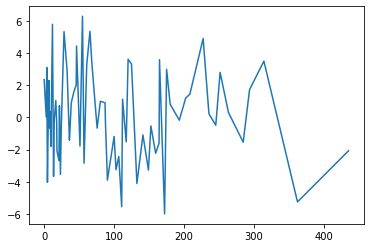

In [27]:
plt.plot(G.e, signal_hat)
plt.show()
# np.histogram(G.d)

In [28]:
len(folders)

52

In [112]:
lfc_cutoff = 0.26
for index, folder in enumerate(folders):
    G = G_dict[folder]
    sequence = pickle.load(open('../new_pdb/' + folder + '/sequence.p'))
#     signal = [amino_molecular_mass[s] for s in sequence]
#     signal = G.e
#     signal = range(1, len(sequence)+1) -- MEaningless - Discuss
#     residue_counts = collections.Counter(sequence)
#     signal = [residue_counts[s] for s in sequence]
    NX = NX_dict[folder]
    signal = nx.clustering(NX).values()
    signal = np.array(signal)
    signal_hat = G.gft(signal)
    print np.sum(abs(signal_hat[G.e < G.lmax*lfc_cutoff])) / np.sum(abs(signal_hat))

0.8840338038682893
0.8270498758835082
0.9275807531114897
0.9664340280564974
0.916475494501068
0.8961407277784491
0.8341963155078641
0.8679584903115527
0.8680355675040025
0.8489536938726371
0.9229519968483676
0.9598414490340742
0.9630620393431801
0.8025127471458601
0.8418521504135505
0.839094627252221
0.9410050740241276
0.9264108043878233
0.9347684087676259
0.9479879957147463
0.887068800552406
0.8957931178172233
0.8650200393370583
0.9138491011445912
0.9157012974350416
0.9413536068575968
0.925760058090848
0.8610021641896467
0.911977143550148
0.8605847449598584
0.8497901406607896
0.8740527320434157
0.8506930722795552
0.8347549507012327
0.8760976257220934
0.8106296708912764
0.9030093221547513
0.9291774035245204
0.9495020576156208
0.9180387622763075
0.8316774902126319
0.9247447703621152
0.924231943126282
0.905835649778908
0.805028723966739
0.8378455652968262
0.8710722171015985
0.8230922092156041
0.8704130827903348
0.9251282368662994
0.8965735249449591
0.8955093073206335


In [8]:
# import numpy as np
?np.argsort